# cadCAD Experiment
Over 500 timesteps, money comes in to the system each timestep and is distributed to delegators according to the proportion of shares they have bought.  The share price and number are tied to a bonding curve.  

They purchase shares in the system according to their belief of the future revenue streams.

In [1]:
# if this crashes, run this:
# pip install ipython-autotime
%load_ext autotime
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")

time: 47 ms (started: 2021-04-07 17:43:56 -04:00)


In [2]:
import matplotlib.pyplot as plt
from model.run import run

# df = run()


time: 1.27 s (started: 2021-04-07 17:43:56 -04:00)


In [3]:
from cadCAD_tools import profile_run

from model.psub import psubs
from model.state import genesis_state
from model.config import simulation_config
from model.config import params

TIMESTEPS = len(simulation_config[0]['T'])
SAMPLES = simulation_config[0]['N'] 
# df = run()
df = profile_run(genesis_state,
                 params,
                 psubs,
                 TIMESTEPS,
                 SAMPLES)
from cadCAD_tools.profiling.visualizations import visualize_substep_impact

visualize_substep_impact(df, relative=True)


self.id=0, self.delegator_type=2
delegator_type=2, normalized_weights=[0, 1, 0]

                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (500, 17, 1, 7)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
smoothing_factor=0.9
self.id=1, self.delegator_type=1
delegator_type=1, normalized_weights=[1, 0, 0]
buy_or_sell: DELEGATOR timestep=1: 1 -- self.private_price=2.0, spot_price=2, pct_price_diff=0.0, self.reserve_token_holdings=72.75281020249614, self.shares=0
smoothing_factor=0.9
self.id=2, self.delegator_type=2
delegator_type=2, normalized_weights=[0, 1, 0]
buy_or_sell: DELEGATOR timestep=2: 0 -- self.private_price=6.65, spot_price=2.0, pct_price_d

time: 13.7 s (started: 2021-04-07 17:43:57 -04:00)


In [4]:
max_substep = max(df.substep)
print(max_substep)
df = df[df.substep==max_substep].reset_index()

17
time: 157 ms (started: 2021-04-07 17:44:11 -04:00)


In [5]:
df

,index,reserve,supply,delegators,period_revenue,spot_price,expected_revenue,run_time,simulation,subset,...,reserve_to_revenue_token_exchange_rate,delegator_activity_rate,mininum_required_price_pct_diff_to_act,risk_adjustment,half_life_vesting_rate,cliff_vesting_timesteps,num_days_for_trends,halflife,mean_discount_rate,max_delegator_count
0,17,10.000000,10.000000,{0: <model.model.delegator.Delegator object at...,1.681333,2.000000,7,1.617832e+09,0,0,...,1,0.5,0.02,0.7,0.5,14,14,0.5,0.7,4
1,34,10.000000,10.000000,{0: <model.model.delegator.Delegator object at...,2.581491,2.000000,7,1.617832e+09,0,0,...,1,0.5,0.02,0.7,0.5,14,14,0.5,0.7,4
2,51,110.556250,33.250000,{0: <model.model.delegator.Delegator object at...,4.513661,6.650000,7,1.617832e+09,0,0,...,1,0.5,0.02,0.7,0.5,14,14,0.5,0.7,4
3,68,293.493062,54.175000,{0: <model.model.delegator.Delegator object at...,12.735971,10.835000,7,1.617832e+09,0,0,...,1,0.5,0.02,0.7,0.5,14,14,0.5,0.7,4
4,85,343.497524,58.608662,{0: <model.model.delegator.Delegator object at...,4.910845,11.721732,7,1.617832e+09,0,0,...,1,0.5,0.02,0.7,0.5,14,14,0.5,0.7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,8432,284.829703,53.369439,{0: <model.model.delegator.Delegator object at...,25.518538,10.673888,70,1.617832e+09,0,0,...,1,0.5,0.02,0.7,0.5,14,14,0.5,0.7,4
496,8449,284.829703,53.369439,{0: <model.model.delegator.Delegator object at...,100.977981,10.673888,70,1.617832e+09,0,0,...,1,0.5,0.02,0.7,0.5,14,14,0.5,0.7,4
497,8466,284.829703,53.369439,{0: <model.model.delegator.Delegator object at...,20.735173,10.673888,70,1.617832e+09,0,0,...,1,0.5,0.02,0.7,0.5,14,14,0.5,0.7,4
498,8483,284.829703,53.369439,{0: <model.model.delegator.Delegator object at...,20.258837,10.673888,70,1.617832e+09,0,0,...,1,0.5,0.02,0.7,0.5,14,14,0.5,0.7,4


time: 172 ms (started: 2021-04-07 17:44:11 -04:00)


# Revenue coming in each period.  
### Mean is an exponentially distributed parameter.  

## Shock to the system @ timestep 250.
### Timsteps 1-250: mean=7
### Timesteps 251-500: mean=70



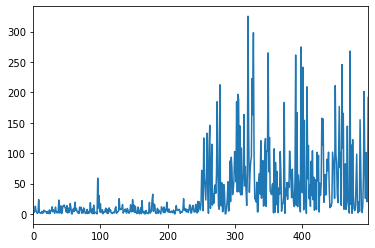

time: 407 ms (started: 2021-04-07 17:44:11 -04:00)


In [6]:
df.period_revenue.plot()

In [7]:
import pandas as pd
df1 = df.reset_index().delegators

delegator_revenue_token_holdings = {}
delegator_shares = {}
timestep = 0
for delegator_dict in df1:
    for delegator_id, delegator in delegator_dict.items():
        if delegator_id not in delegator_revenue_token_holdings:
            delegator_revenue_token_holdings[delegator_id] = {}
            delegator_shares[delegator_id] = {}
        delegator_revenue_token_holdings[delegator_id][timestep] = delegator.revenue_token_holdings
        delegator_shares[delegator_id][timestep] = delegator.shares
        
    timestep += 1

time: 156 ms (started: 2021-04-07 17:44:11 -04:00)


# Shares broken down by Delegator
This shows a stacked plot with the sum of shares owned by the individual delegators. There is a jump in shares at the shock point at timestep = 250 where the dividend value from owning the shares increases 10x.

<table class="tg">
<thead>
  <tr>
    <th>Delegator ID</th>
    <th>Delegator Type</th>
    <th>Delegator Pricing Model</th>
    <th>Delegator Description</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>0</td>
    <td>Owner</td>
    <td>Value</td>
    <td>spot_price will converge to the value of the revenue stream.</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Non-Owner</td>
    <td>Regression to Mean</td>
    <td>spot_price will return to what it used to be.</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Non-Owner</td>
    <td>Value</td>
    <td>spot_price will converge to the value of the revenue stream.</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Non-Owner</td>
    <td>Trendline</td>
    <td>spot_price will continue moving in the same direction as it has in the past.</td>
  </tr>
</tbody>
</table>


* The delegators act in randomized order, so 0 and 2 will not have the same result.
* There is an initial spike in shares owned because the shares are not very diluted and are thus valuable.
* Then, at timestep = 250, there is another spike in shares_owned because the dividends increase by a factor of 10.

Text(0, 0.5, 'Delegator Shares')

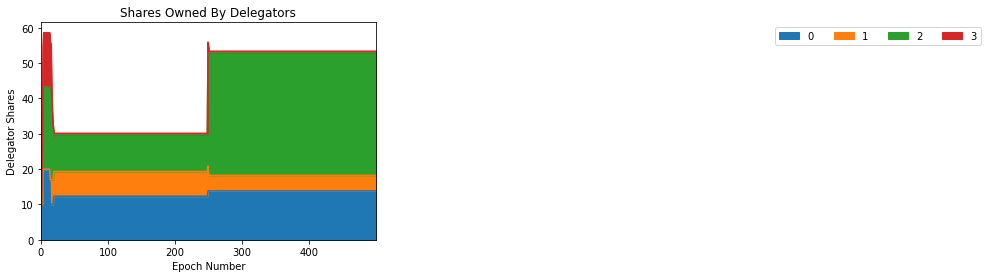

time: 453 ms (started: 2021-04-07 17:44:12 -04:00)


In [8]:


df_plot = pd.DataFrame(delegator_shares)
df_plot.plot(kind='area')
plt.gca().legend(loc=9, bbox_to_anchor=(2.5, 1), ncol=12)
plt.title('Shares Owned By Delegators')
plt.xlabel('Epoch Number')
plt.ylabel('Delegator Shares')

# Cumulative Revenue Token Holdings



Text(0, 0.5, 'Revenue Token Holdings')

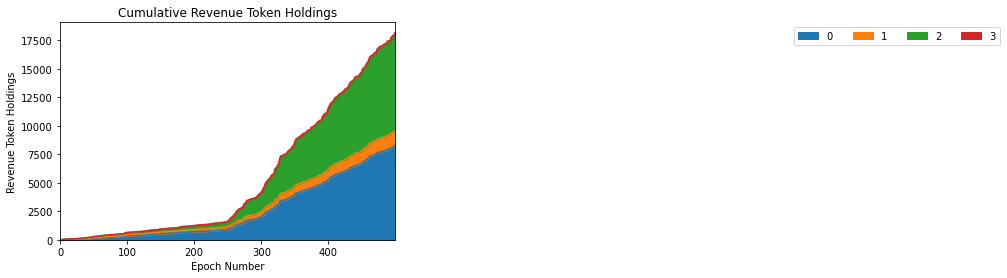

time: 454 ms (started: 2021-04-07 17:44:12 -04:00)


In [9]:
df_plot = pd.DataFrame(delegator_revenue_token_holdings)
df_plot.plot(kind='area')
plt.gca().legend(loc=9, bbox_to_anchor=(2.5, 1), ncol=12)
plt.title('Cumulative Revenue Token Holdings')
plt.xlabel('Epoch Number')
plt.ylabel('Revenue Token Holdings')

Exploratory data analysis

In [10]:
df['shareholders'] = df.delegators.apply(lambda x: [k for k in x.keys() if x[k].shares>0] )

time: 125 ms (started: 2021-04-07 17:44:13 -04:00)


In [11]:
df['shares'] = df.delegators.apply(lambda x: [x[k].shares for k in x.keys() if x[k].shares>0] )

time: 125 ms (started: 2021-04-07 17:44:13 -04:00)


In [12]:
df_list = []
for t in range(len(df)):
    temp_df = pd.DataFrame({'shareholder':df.shareholders.iloc[t] , 'shares':df.shares.iloc[t]})
    temp_df['Epoch Number'] = t

    df_list.append(temp_df)

shareholder_df = pd.concat(df_list)

time: 890 ms (started: 2021-04-07 17:44:13 -04:00)


In [13]:
shareholder_df

,shareholder,shares,Epoch Number
0,0,10.000000,0
0,0,10.000000,1
0,0,10.000000,2
1,2,23.250000,2
0,0,20.000000,3
...,...,...,...
3,3,0.417707,498
0,0,13.856538,499
1,1,4.401760,499
2,2,34.693434,499


time: 109 ms (started: 2021-04-07 17:44:14 -04:00)


# Price per share

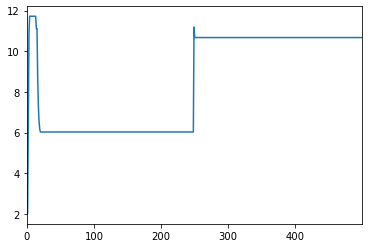

time: 375 ms (started: 2021-04-07 17:44:14 -04:00)


In [14]:
df.spot_price.plot()

In [15]:
df['period_revenue_per_share'] = df.period_revenue/df.supply

time: 109 ms (started: 2021-04-07 17:44:14 -04:00)


# Revenue per share 

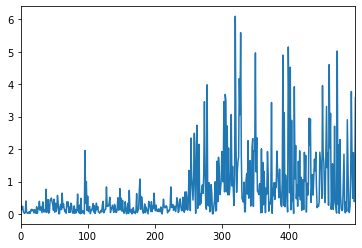

time: 312 ms (started: 2021-04-07 17:44:14 -04:00)


In [16]:
df.period_revenue_per_share.plot()

# Estimated Share Valuation

In [17]:
#estimated share valuation
risk_adj = .7 #if agents get their own param then there exists an estimated value of this system level param
discount_factor = .95 #if agents get their own param there exist an estimated value of this systel level param

df['share_valuation'] = df.spot_price * risk_adj + df.period_revenue_per_share / (1 - discount_factor)
df['ewm_share_valuation'] = df.share_valuation.ewm(halflife = 10).mean()

time: 109 ms (started: 2021-04-07 17:44:15 -04:00)


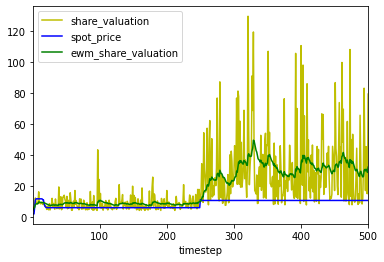

time: 375 ms (started: 2021-04-07 17:44:15 -04:00)


In [18]:
df[['share_valuation', 'spot_price', 'ewm_share_valuation', 'timestep']].plot(x='timestep', color='ybg')

In [19]:
df.columns

Index(['index', 'reserve', 'supply', 'delegators', 'period_revenue',
       'spot_price', 'expected_revenue', 'run_time', 'simulation', 'subset',
       'run', 'substep', 'timestep', 'initial_reserve', 'initial_supply',
       'owners_share', 'arrival_rate', 'expected_reserve_token_holdings',
       'delegator_estimation_noise_mean',
       'delegator_estimation_noise_variance',
       'reserve_to_revenue_token_exchange_rate', 'delegator_activity_rate',
       'mininum_required_price_pct_diff_to_act', 'risk_adjustment',
       'half_life_vesting_rate', 'cliff_vesting_timesteps',
       'num_days_for_trends', 'halflife', 'mean_discount_rate',
       'max_delegator_count', 'shareholders', 'shares',
       'period_revenue_per_share', 'share_valuation', 'ewm_share_valuation'],
      dtype='object')

time: 110 ms (started: 2021-04-07 17:44:15 -04:00)


In [20]:
# each timestep has a dict with {delegatorId: private_price} 
df['private_prices'] = df.delegators.apply(lambda x: {k: x[k].private_price for k in x.keys()} )
df['regression_to_mean_private_prices'] = df.delegators.apply(lambda x: {k: x[k].regression_to_mean_private_price for k in x.keys()} )
df['value_private_prices'] = df.delegators.apply(lambda x: {k: x[k].value_private_price for k in x.keys()} )
df['trendline_private_prices'] = df.delegators.apply(lambda x: {k: x[k].trendline_private_price for k in x.keys()} )


time: 109 ms (started: 2021-04-07 17:44:15 -04:00)


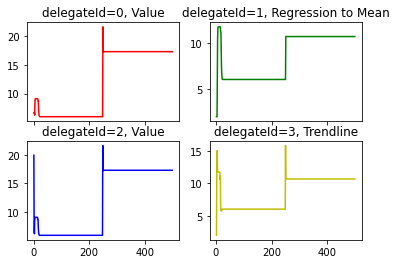

time: 1.11 s (started: 2021-04-07 17:44:16 -04:00)


In [21]:
import matplotlib.pylab as plt

# d = df['regression_to_mean_private_prices']
# d = df['value_private_prices']
d = df['private_prices']

timestep = 0
delegateId = 0

# initialize a list of 4 lists
x = [[] for _ in range(4)]
y = [[] for _ in range(4)]

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2)
axs = [ax0, ax1, ax2, ax3]

for timestep in range(500):
    # print(f'{timestep=}')
    for delegateId, price in d[timestep].items():    
        # print(f'{delegateId=}, {price=}')
        # The data has to be in the form x = [timesteps], y = [values]
        # the data is in the form y = dict({key=delegator, value=private_price})        
        x[delegateId].append(timestep)
        y[delegateId].append(price)
        
colors = 'rgby'
for delegateId in range(4):    
    
    axs[delegateId].plot(x[delegateId], y[delegateId], colors[delegateId])
    if delegateId in (0,2):
        axs[delegateId].set_title(f'{delegateId=}, Value')
    elif delegateId == 1:
        axs[delegateId].set_title(f'{delegateId=}, Regression to Mean')
    elif delegateId == 3:
        axs[delegateId].set_title(f'{delegateId=}, Trendline')


plt.setp(ax0.get_xticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.show()


# Questions?
* What other parameters can we add to the model?  
* What other visualizations would we like to see?

In [22]:
# df['regression_to_mean_private_prices']

# for i in range(500):
#     # print(df['regression_to_mean_private_prices'][i])
#     # print(df['value_private_prices'][i])
#     # print(df['trendline_private_prices'][i])
#     print(i, df['private_prices'][i])

time: 109 ms (started: 2021-04-07 17:44:17 -04:00)


In [23]:
# show smoothing factors are all different.
# for id in range(25):
#     print(df.iloc[499].delegators[id].smoothing_factor)

time: 109 ms (started: 2021-04-07 17:44:17 -04:00)
